Part 1: Importing Data, Preprocessing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount("/content/drive", force_remount=True)
#Open the dataset files from Alianno's Google Drive
fake_headlines = "/content/drive/MyDrive/School/CP322/Assignment 1/A1_Q2_Decision_Tree_Dataset/fake.txt"
real_headlines = "/content/drive/MyDrive/School/CP322/Assignment 1/A1_Q2_Decision_Tree_Dataset/real.txt"

def load_data():
  with open(real_headlines, 'r') as file_real:
    real_data = [line.strip() for line in file_real.readlines()] #Define's read_real as a list of the lines in real_headlines

  with open(fake_headlines, 'r') as file_fake:
    fake_data = [line.strip() for line in file_fake.readlines()] #Define's read_fake as a list of the lines in fake_headlines

  # Assign labels (1 for real, 0 for fake)
  real_labels = [1] * len(real_data)
  fake_labels = [0] * len(fake_data)

  # Combine the real headlines and real labels into combined lists
  # all data saved in the same order, so that it matches up when it's trained
  all_data = real_data + fake_data
  all_labels = real_labels + fake_labels

  # Convert text to numerical features using CountVectorizer
  vectorizer = CountVectorizer()
  all_data_vector = vectorizer.fit_transform(all_data)  # Creates a sparse matrix (headlines × unique words)

  # Split into train (70%), validation (15%), and test (15%) sets
  X_train, X_temp, y_train, y_temp = train_test_split(all_data_vector, all_labels, test_size=0.3, random_state=6)
  X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=6)

  return X_train, X_val, X_test, y_train, y_val, y_test, vectorizer

# Run the function and load data
# drive.mount("/content/drive", force_remount=True)
X_train, X_val, X_test, y_train, y_val, y_test, vectorizer = load_data()

# Print some information about the processed data
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")
print("\nFirst 10 words in vocabulary:", vectorizer.get_feature_names_out()[:10])  # Show first 10 words

Mounted at /content/drive
Training set size: (2286, 5799)
Validation set size: (490, 5799)
Test set size: (490, 5799)

First 10 words in vocabulary: ['00' '000' '10' '100' '100mln' '10m' '11' '11yo' '12' '125']


Part 2: Decision Tree Training

Decision Tree with max_depth = 1
Accuracy on Validation Set: 0.6448979591836734
Decision Tree Accuracy on Test Set: 0.6387755102040816


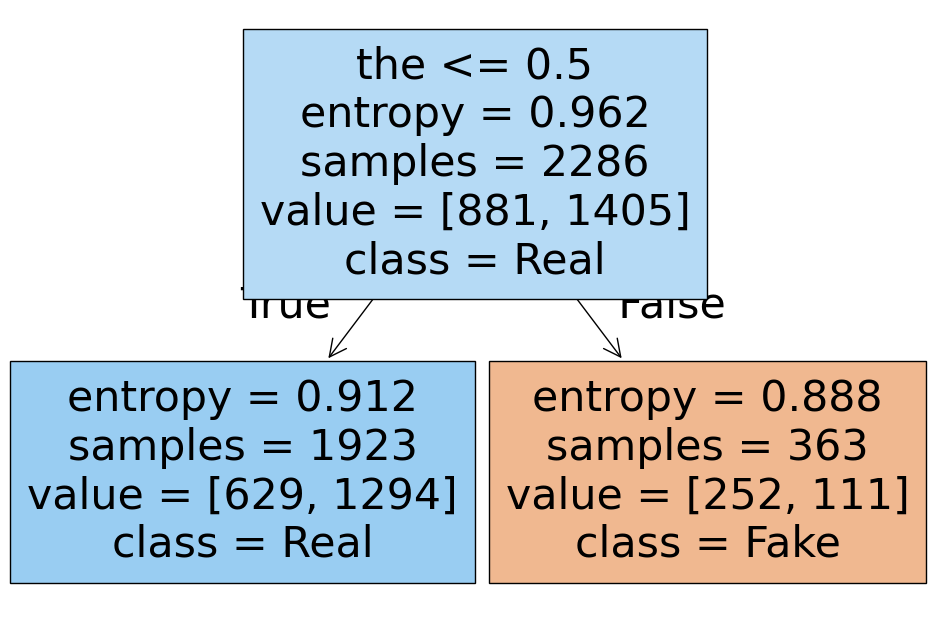

Decision Tree with max_depth = 3
Accuracy on Validation Set: 0.6795918367346939
Decision Tree Accuracy on Test Set: 0.6714285714285714


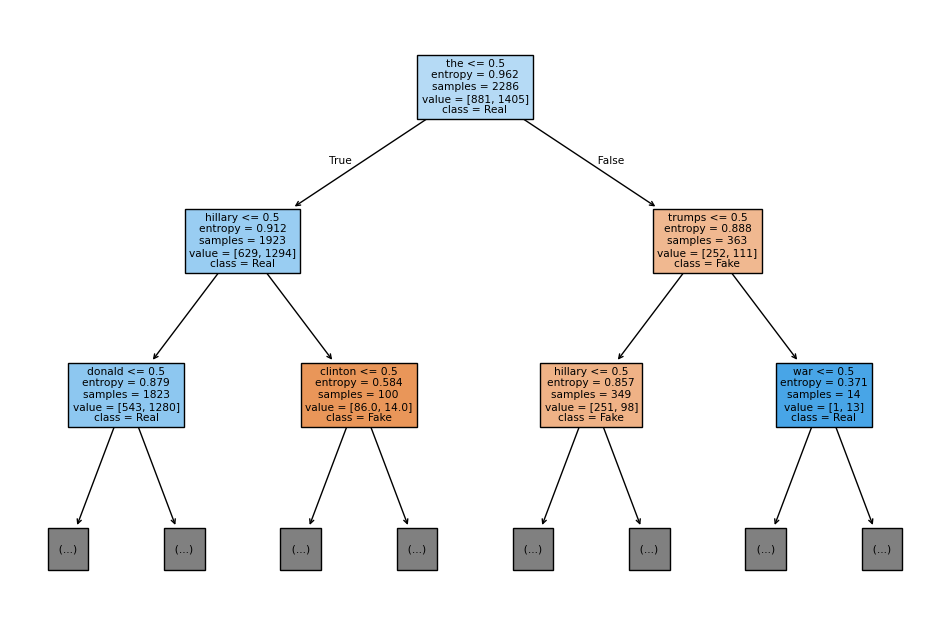

Decision Tree with max_depth = 5
Accuracy on Validation Set: 0.6836734693877551
Decision Tree Accuracy on Test Set: 0.6816326530612244


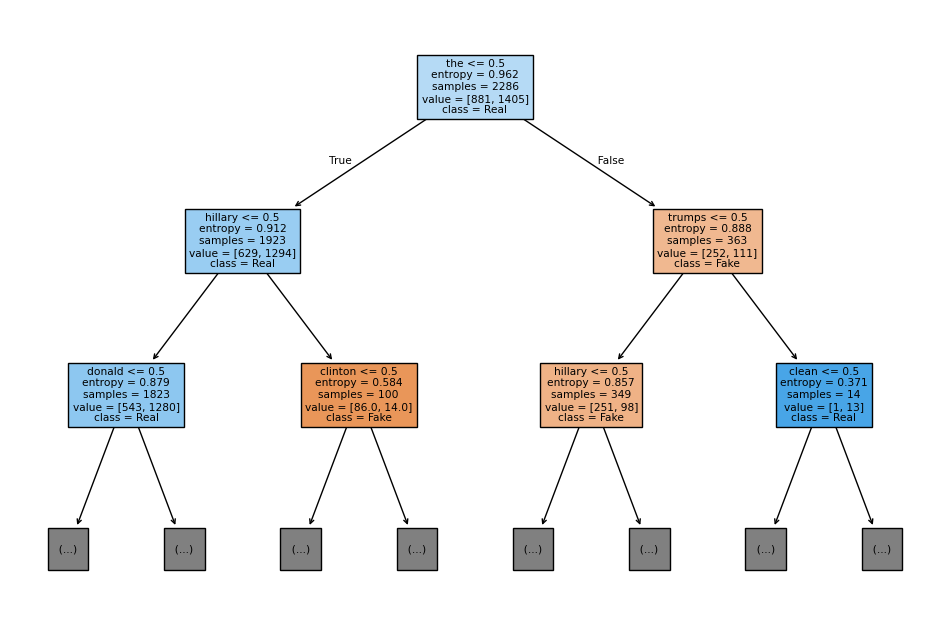

Decision Tree with max_depth = 7
Accuracy on Validation Set: 0.6836734693877551
Decision Tree Accuracy on Test Set: 0.6693877551020408


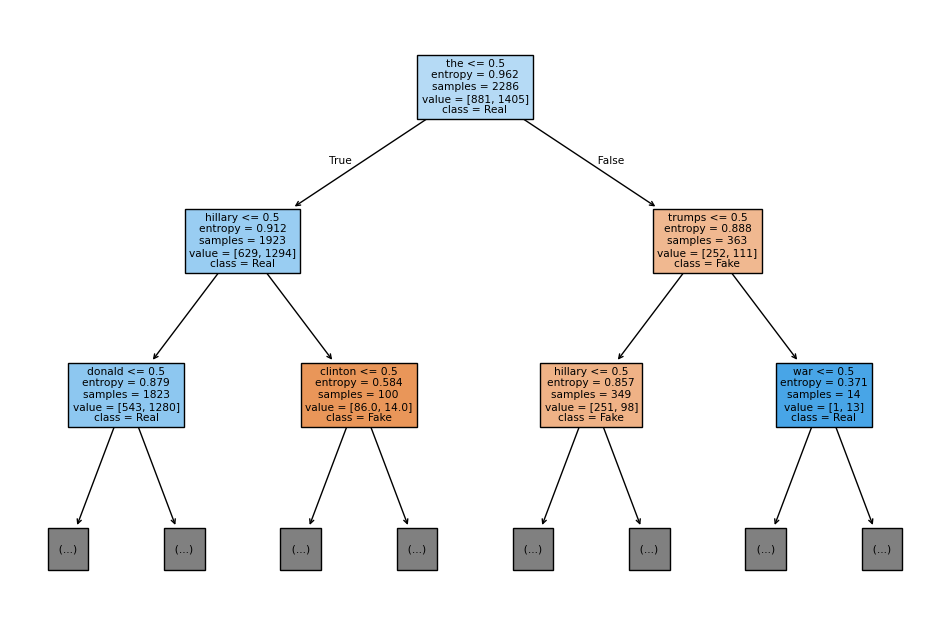

Decision Tree with max_depth = 10
Accuracy on Validation Set: 0.6959183673469388
Decision Tree Accuracy on Test Set: 0.673469387755102


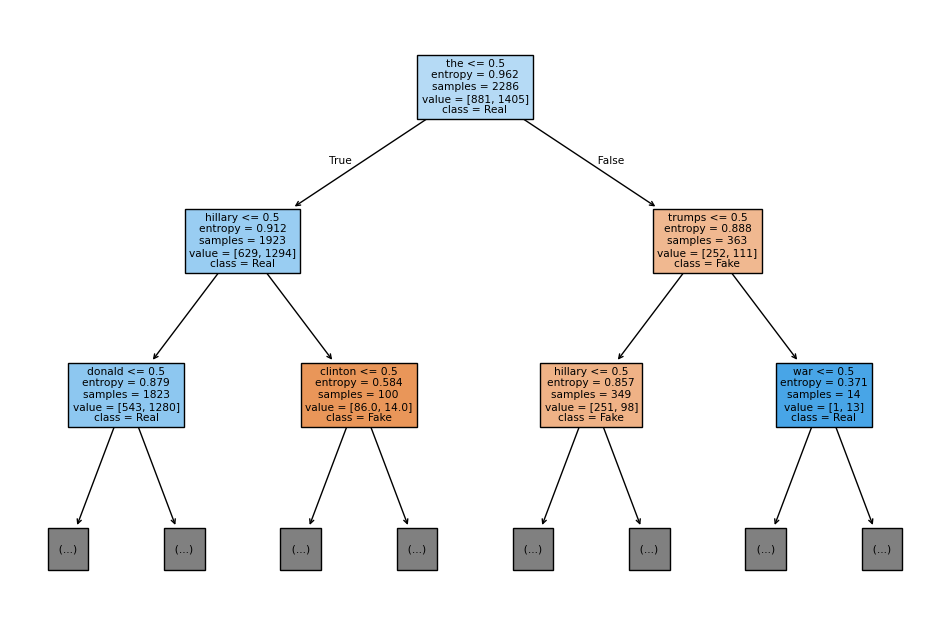

Text(0.5, 1.0, 'Validation Accuracy vs. Max Depth')

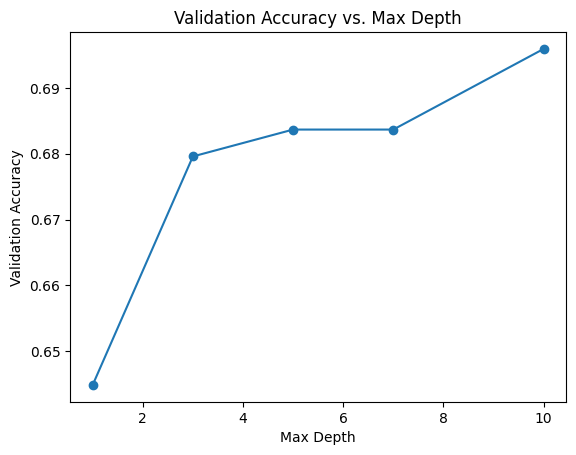

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt, matplotlib.pyplot as plt2


validation_accuracies = []

max_tree_depth = [1,3,5,7,10] # Depth - determined to control/test the level of fit
for depth in max_tree_depth:
  print(f"Decision Tree with max_depth = {depth}")
  data_decision_tree = DecisionTreeClassifier(criterion ="entropy", random_state=6, max_depth=depth)
  data_decision_tree.fit(X_train, y_train)

  # Make predictions on the validation set
  y_pred_val = data_decision_tree.predict(X_val)

  # Determine the accuracy of the Decision Tree validation set
  accuracy_val = accuracy_score(y_val, y_pred_val)
  validation_accuracies.append(accuracy_val)
  print(f"Accuracy on Validation Set: {accuracy_val}")

  # Make predictions on the test set
  y_pred_test = data_decision_tree.predict(X_test)

  # Evaluate the model's accuracy on the test set
  accuracy_test = accuracy_score(y_test, y_pred_test)
  print(f"Decision Tree Accuracy on Test Set: {accuracy_test}")



  plt.figure(figsize=(12, 8))  # Set figure size
  plot_tree(data_decision_tree,
            filled=True,
            feature_names=vectorizer.get_feature_names_out(),  # Get word features
            class_names=["Fake", "Real"],
            max_depth=2)  # Only show the first 2 layers
  plt.show()



""" After iterating through the depth list, create a graph that plots the relation
between the max depth and the validation accuracy. """

plt2.plot(max_tree_depth, validation_accuracies, marker='o')
plt2.xlabel('Max Depth')
plt2.ylabel('Validation Accuracy')
plt2.title('Validation Accuracy vs. Max Depth')